In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')


In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


# General overview of dataset

In [260]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df

CustomerID             Name   Age  Gender     Location  \
0             1.0       Customer_1  63.0    Male  Los Angeles   
1             2.0       Customer_2  62.0  Female     New York   
2             3.0       Customer_3  24.0  Female  Los Angeles   
3             4.0       Customer_4  36.0  Female        Miami   
4             5.0       Customer_5  46.0  Female        Miami   
...           ...              ...   ...     ...          ...   
99995     99996.0   Customer_99996  33.0    Male      Houston   
99996     99997.0   Customer_99997  62.0  Female     New York   
99997     99998.0   Customer_99998  64.0    Male      Chicago   
99998     99999.0   Customer_99999  51.0  Female     New York   
99999    100000.0  Customer_100000  27.0  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                            17.0         73.36           236.0    0.0  
1                             1.0         48.76           172.0    0.0  
2                             5.0         85.47           460.0    0.0  
3                             3.0         97.94           297.0    1.0  
4                            19.0         58.14           266.0    0.0  
...                           ...           ...             ...    ...  
99995                        23.0         55.13           226.0    1.0  
99996                        19.0         61.65           351.0    0.0  
99997                        17.0         96.11           251.0    1.0  
99998                        20.0         49.25           434.0    1.0  
99999                        19.0         76.57           173.0    1.0  

[100000 rows x 9 columns]

In [261]:
df['Churn'].value_counts()

0.0    50221
1.0    49779
Name: Churn, dtype: int64

In [262]:
df.head()

CustomerID        Name   Age  Gender     Location  \
0         1.0  Customer_1  63.0    Male  Los Angeles   
1         2.0  Customer_2  62.0  Female     New York   
2         3.0  Customer_3  24.0  Female  Los Angeles   
3         4.0  Customer_4  36.0  Female        Miami   
4         5.0  Customer_5  46.0  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                        17.0         73.36           236.0    0.0  
1                         1.0         48.76           172.0    0.0  
2                         5.0         85.47           460.0    0.0  
3                         3.0         97.94           297.0    1.0  
4                        19.0         58.14           266.0    0.0

In [263]:
df.shape

(100000, 9)

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 6.9+ MB


In [265]:
df.columns.values

array(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'], dtype=object)

In [266]:
df.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
dtype: object

In [267]:
df.describe()

CustomerID            Age  Subscription_Length_Months  \
count  100000.000000  100000.000000               100000.000000   
mean    50000.500000      44.027020                   12.490100   
std     28867.657797      15.280283                    6.926461   
min         1.000000      18.000000                    1.000000   
25%     25000.750000      31.000000                    6.000000   
50%     50000.500000      44.000000                   12.000000   
75%     75000.250000      57.000000                   19.000000   
max    100000.000000      70.000000                   24.000000   

        Monthly_Bill  Total_Usage_GB          Churn  
count  100000.000000   100000.000000  100000.000000  
mean       65.053197      274.393650       0.497790  
std        20.230696      130.463063       0.499998  
min        30.000000       50.000000       0.000000  
25%        47.540000      161.000000       0.000000  
50%        65.010000      274.000000       0.000000  
75%        82.640000      387.000000       1.000000  
max       100.000000      500.000000       1.000000

# null values

<AxesSubplot:>

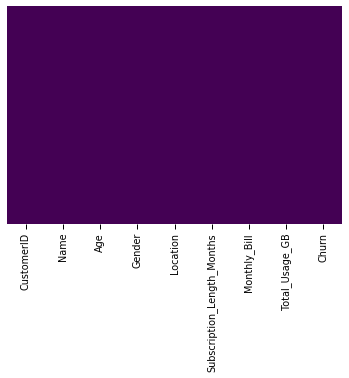

In [268]:
sns.heatmap(df.isnull() , yticklabels = False , cbar = False , cmap = "viridis")

* As we can see, this dataset does not have any null/NaN values.

# Droping duplicates

In [269]:
print("The shape of dataset before dropping duplicates : " , df.shape)
df.drop_duplicates(subset = ['CustomerID'], keep='last' , inplace = True)    
print("The shape of dataset after dropping duplicates : " , df.shape)

The shape of dataset before dropping duplicates :  (100000, 9)
The shape of dataset after dropping duplicates :  (100000, 9)


In [270]:
df.duplicated().sum()

0

In [271]:
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

* As observed, there are no duplicates in the dataset.

# Data visualization

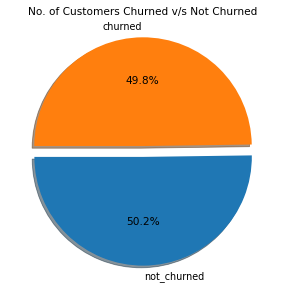

In [323]:
# Checking the Imbalance in Data
not_churned = df[df['Churn']==0]['Churn'].count()
churned = df[df['Churn']==1]['Churn'].count()

fig = plt.figure(figsize=(5,5)) 
plt.pie([not_churned,churned], labels=['not_churned','churned'],explode=(0,0.1),\
        shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

* There is no significant imbalance in the dateset.

In [322]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* Customers are 49.8% Female and 50.2% Male.
* 49.8% of customers wants to leave the firm.

0.0    50221
1.0    49779
Name: Churn, dtype: int64


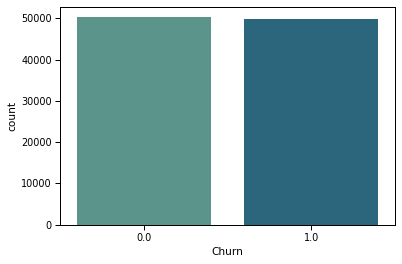

In [321]:
print(df['Churn'].value_counts())
_ = sns.countplot(x='Churn', data=df, palette='crest')

In [273]:
fig = px.histogram(df, x="Churn", color="Location", barmode="group", title="<b>Customer Location distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* Almost all the customers are located in the mentioned 5 cities.

In [274]:
labels = df['Subscription_Length_Months'].unique()
values = df['Subscription_Length_Months'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Subscription_Length_Months Distribution</b>")
fig.show()

* We can assume that if the length of the monthly subscription is more, then the customer in unlikely to leave the firm.


In [275]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(df, x="Churn", color="Gender", title="<b>Chrun distribution w.r.t. Gender</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

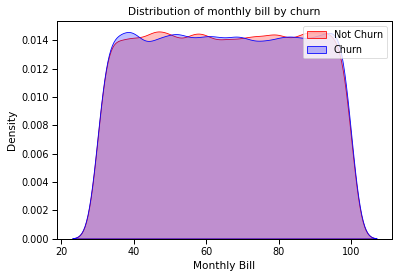

In [302]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0) ],color="Red", shade = True);
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1) ], ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Bill');
ax.set_title('Distribution of monthly bill by churn');

* As observed in the dataset, if the monthly bill is high, then the customer is likely to churn.

In [304]:
fig = px.box(df, x='Churn', y = 'Monthly_Bill')

# Update yaxis properties
fig.update_yaxes(title_text='Monthly_BIll', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Monthly_Bill vs Churn</b>',
)

fig.show()

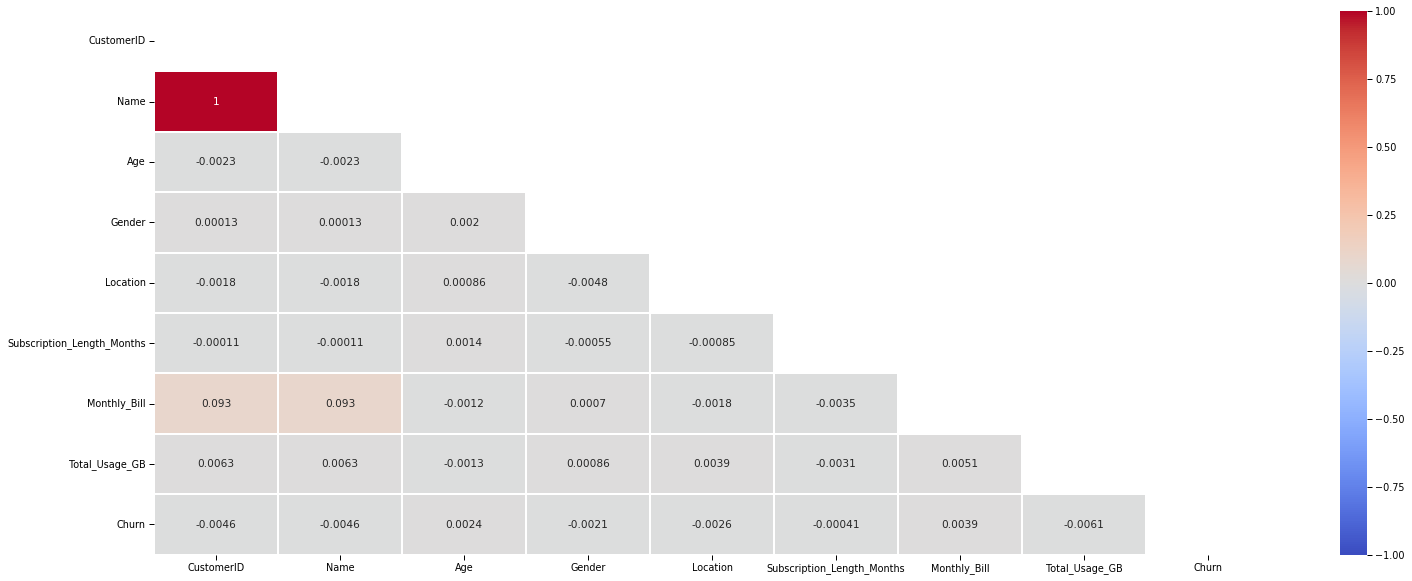

In [299]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

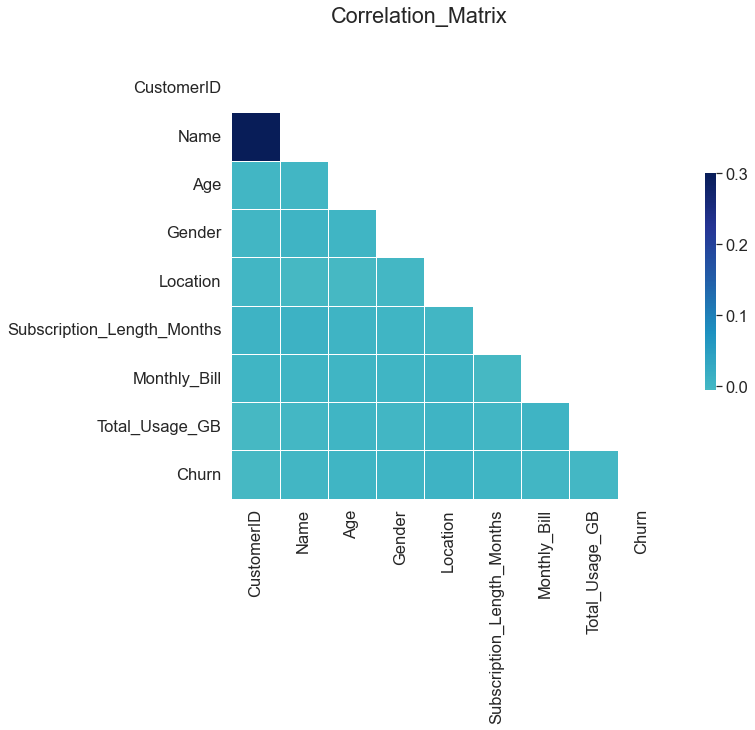

In [324]:
sns.set(style="white", font_scale =1.5)
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #remove the values on the other side bcz they are same.

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# splitting data into train and test sets

In [305]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [306]:
df = df.apply(lambda x: object_to_int(x))
df.head()

CustomerID   Name   Age  Gender  Location  Subscription_Length_Months  \
0         1.0      0  63.0       1         2                        17.0   
1         2.0  11112  62.0       0         4                         1.0   
2         3.0  22223  24.0       0         2                         5.0   
3         4.0  33334  36.0       0         3                         3.0   
4         5.0  44445  46.0       0         3                        19.0   

   Monthly_Bill  Total_Usage_GB  Churn  
0         73.36           236.0    0.0  
1         48.76           172.0    0.0  
2         85.47           460.0    0.0  
3         97.94           297.0    1.0  
4         58.14           266.0    0.0

In [307]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 1, stratify=y)

In [309]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

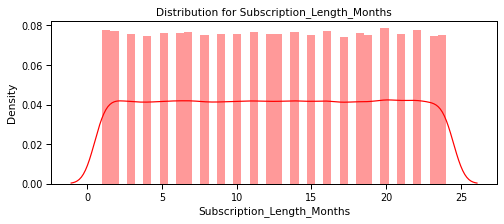

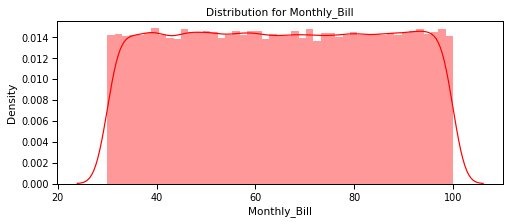

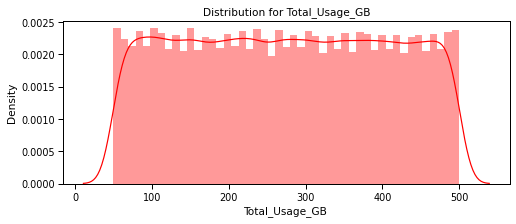

In [310]:
num_cols = ['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
for feat in num_cols: distplot(feat, df)

In [311]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# machine learning model evaluations

# KNN algorithm

In [312]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.5032


In [313]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

         0.0       0.51      0.51      0.51     10044
         1.0       0.50      0.50      0.50      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



# Random Forest

In [314]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.5015


In [315]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.50      0.71      0.59     10044
         1.0       0.50      0.29      0.37      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000



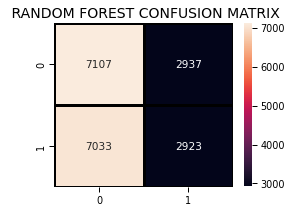

In [316]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

# Logistic Regression

In [317]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.50495


In [318]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.50      0.91      0.65     10044
         1.0       0.51      0.10      0.17      9956

    accuracy                           0.50     20000
   macro avg       0.51      0.50      0.41     20000
weighted avg       0.51      0.50      0.41     20000



In [319]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

# Decision tree

In [293]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.49455


In [294]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50     10044
         1.0       0.49      0.49      0.49      9956

    accuracy                           0.49     20000
   macro avg       0.49      0.49      0.49     20000
weighted avg       0.49      0.49      0.49     20000



In [295]:
from sklearn.ensemble import VotingClassifier
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))

Final Accuracy Score 
0.499


In [296]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.50      0.70      0.58     10044
         1.0       0.49      0.30      0.37      9956

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.50      0.50      0.48     20000



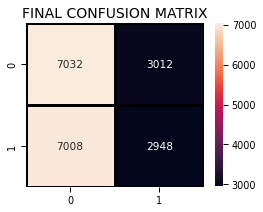

In [297]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

# Observation

From the confusion matrix we can see that: There are total 7032+3012=10044 actual non-churn values and the algorithm predicts 7032 of them as non churn and 3012 of them as churn. While there are 7008+2948=9956 actual churn values and the algorithm predicts 7008 of them as non churn values and 2948 of them as churn values.